In [1]:
import torch
import numpy
import matplotlib.pyplot as plt


In [2]:
#for the following trainng data, build a linear regression model, assume w and b are initialized with 1 and learning parameters are set to 0.01
x = torch.tensor([11.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])
losses = []
learning_rate = torch.tensor(0.001)
w = torch.tensor([1.0], requires_grad = True)
b = torch.tensor([1.0], requires_grad = True)
for epoch in range(0, 50):
    loss = 0.0
    for data in range(0, len(x)):
        a = w*x[data]
        y_out = a + b
        loss += (y_out - y[data])**2
    loss = loss/len(x)
    losses.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
    w.grad.zero_()
    b.grad.zero_()
    print("Epoch number: " + str(epoch) + " W: " + str(w.item()) + " B: " + str(b.item()))

Epoch number: 0 W: 0.8889608383178711 B: 0.9937565326690674
Epoch number: 1 W: 0.8468886017799377 B: 0.9913945198059082
Epoch number: 2 W: 0.8309475183486938 B: 0.990503191947937
Epoch number: 3 W: 0.8249073028564453 B: 0.990169107913971
Epoch number: 4 W: 0.8226184844970703 B: 0.9900461435317993
Epoch number: 5 W: 0.8217511177062988 B: 0.9900031685829163
Epoch number: 6 W: 0.821422278881073 B: 0.9899904727935791
Epoch number: 7 W: 0.8212974667549133 B: 0.9899892807006836
Epoch number: 8 W: 0.8212499618530273 B: 0.9899924397468567
Epoch number: 9 W: 0.8212317824363708 B: 0.9899972677230835
Epoch number: 10 W: 0.8212246894836426 B: 0.9900026917457581
Epoch number: 11 W: 0.8212217688560486 B: 0.9900083541870117
Epoch number: 12 W: 0.8212204575538635 B: 0.9900141358375549
Epoch number: 13 W: 0.8212197422981262 B: 0.9900199174880981
Epoch number: 14 W: 0.821219265460968 B: 0.9900256991386414
Epoch number: 15 W: 0.8212189078330994 B: 0.9900315403938293
Epoch number: 16 W: 0.8212185502052307

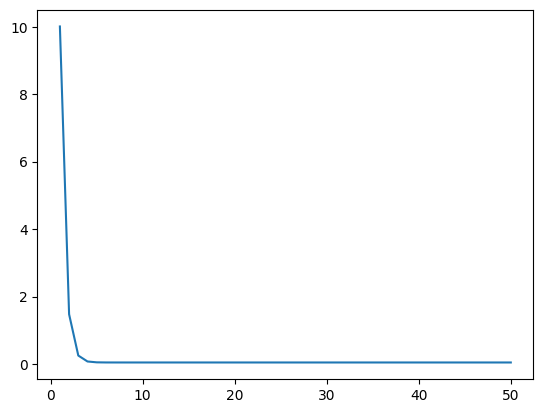

In [3]:
plt.plot([a for a in range(1, len(losses) + 1)], losses)
plt.show()

In [4]:
#Find the value of w.grad and b.grad using analytical solution for the given linear regressio proble,. INitial values of w = b = 1, learning parameter is set t0 0.001. Implement for two epochs
x = torch.tensor([2, 4])
y = torch.tensor([20, 40])
w = torch.tensor([1.0], requires_grad = True)
b = torch.tensor([1.0], requires_grad = True)
learning_rate = 0.001
for epochs in range(0, 2):
    loss = 0.0
    for data in range(0, len(x)):
        y_out = w*x[data] + b
        loss += (y_out - y[data])**2
    loss.backward()
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
    w.grad.zero_()
    b.grad.zero_()
    print("Epoch number: " + str(epochs) + " W: " + str(w.item()) + " B: " + str(b.item()))




Epoch number: 0 W: 1.3480000495910645 B: 1.1039999723434448
Epoch number: 1 W: 1.680832028388977 B: 1.2034080028533936


In [5]:
#Define a user defined class titled RegressionModel with parameters w and b. Define a constuctor to initialize w and b with values 1 and four functions (forward,update, reset grad and criterion), define an object of the class called model and invoke all methods

class RegressionModel:
    def __init__(self):
        self.w = torch.tensor([1.0], requires_grad = True)
        self.b = torch.tensor([1.0], requires_grad = True)

    def forward(self, x):
        return self.w*x + self.b

    def update(self, learnng_rate):
        self.w -= learning_rate*self.w.grad
        self.b -= learning_rate*self.b.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.w.grad.zero_()

    def criterion(self, y, y_pred):
        return (y - y_pred)**2

    def display(self, epoch):
        print("Epoch number: " + str(epoch) + " W: " + str(self.w.item()) + " B: " + str(self.b.item()))



In [8]:
#Convert the program in Q3 to extend nn.module in your model, also override necessary methods to fit the regression line. Illustrate the use of dataset and dalaloader from torch.utils.data in your implementation, use SGD Optimizer torch.optim.SGD()
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


class m1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(5, 5)
    self.loss_fn = nn.MSELoss(reduction='mean')
    self.op = optim.SGD(self.parameters(), lr = 0.01)

  def forward(self, x):
      y =self.linear1(x)
      return y

class xy_data(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x)
    self.y = torch.tensor(y)

  def size(self):
    return len(self.x)

  def get_item(self, index):
    return [self.x[index], self.y[index]]


data = xy_data([5.0, 7.0, 12.0, 16.0, 20.0], [40.0, 120.0, 180.0, 210.0, 240.0])
loader = DataLoader(list(zip(data.x, data.y)), shuffle = True, batch_size = 5)
n_epochs = 30
losses = []
model = m1()
for epoch in range(n_epochs):
  for x_batch, y_batch in loader:
    y_pred = model.forward(x_batch)
    loss = model.loss_fn(y_pred, y_batch)
    losses.append(loss.item())
    print("Epoch number: " + str(epochs) + " loss value is: " + str(loss))
    model.op.zero_grad()
    loss.backward()
    model.op.step()


Epoch number: 1 loss value is: tensor(28064.0059, grad_fn=<MseLossBackward0>)
Epoch number: 1 loss value is: tensor(97110.1484, grad_fn=<MseLossBackward0>)
Epoch number: 1 loss value is: tensor(184393.9062, grad_fn=<MseLossBackward0>)
Epoch number: 1 loss value is: tensor(800012.1875, grad_fn=<MseLossBackward0>)
Epoch number: 1 loss value is: tensor(5438037., grad_fn=<MseLossBackward0>)
Epoch number: 1 loss value is: tensor(16692784., grad_fn=<MseLossBackward0>)
Epoch number: 1 loss value is: tensor(73247632., grad_fn=<MseLossBackward0>)
Epoch number: 1 loss value is: tensor(3.8261e+08, grad_fn=<MseLossBackward0>)
Epoch number: 1 loss value is: tensor(1.6121e+09, grad_fn=<MseLossBackward0>)
Epoch number: 1 loss value is: tensor(2.7743e+09, grad_fn=<MseLossBackward0>)
Epoch number: 1 loss value is: tensor(8.7931e+09, grad_fn=<MseLossBackward0>)
Epoch number: 1 loss value is: tensor(3.5851e+10, grad_fn=<MseLossBackward0>)
Epoch number: 1 loss value is: tensor(1.3205e+11, grad_fn=<MseLoss

In [8]:
model = RegressionModel()
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
losses = []
for epoch in range(0, 100):
    loss = 0.0
    for data in range(0, len(x)):
        y_out = model.forward(x[data])
        loss += model.criterion(y_out, y[data])
    loss = loss/len(x)
    print(loss)
    losses.append(loss.item())
    loss.backward()
    with torch.no_grad():
        model.update(0.01)
    model.reset_grad()
    model.display(epoch)

tensor([25359.8008], grad_fn=<DivBackward0>)
Epoch number: 0 W: 5.170400619506836 B: 1.2899999618530273
tensor([10952.7344], grad_fn=<DivBackward0>)
Epoch number: 1 W: 7.875868797302246 B: 1.769330382347107
tensor([4853.2378], grad_fn=<DivBackward0>)
Epoch number: 2 W: 9.624000549316406 B: 2.372101306915283
tensor([2282.7014], grad_fn=<DivBackward0>)
Epoch number: 3 W: 10.746519088745117 B: 3.05515193939209
tensor([1206.9427], grad_fn=<DivBackward0>)
Epoch number: 4 W: 11.460212707519531 B: 3.7901759147644043
tensor([761.5485], grad_fn=<DivBackward0>)
Epoch number: 5 W: 11.906758308410645 B: 4.558574199676514
tensor([580.1817], grad_fn=<DivBackward0>)
Epoch number: 6 W: 12.178750038146973 B: 5.348093509674072
tensor([508.2358], grad_fn=<DivBackward0>)
Epoch number: 7 W: 12.33670425415039 B: 6.150626182556152
tensor([480.8898], grad_fn=<DivBackward0>)
Epoch number: 8 W: 12.420177459716797 B: 6.9607768058776855
tensor([471.2479], grad_fn=<DivBackward0>)
Epoch number: 9 W: 12.455024719238

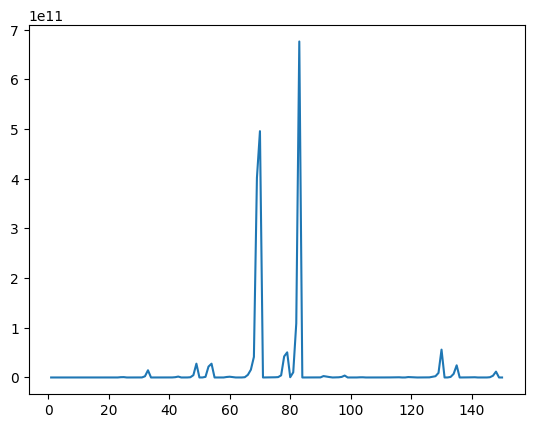

In [ ]:
plt.plot([a for a in range(1, len(losses) + 1)], losses)
plt.show()

In [9]:
#Use PyTorch's nn.Linear() in your implementation to perform linear regression for the data in Q1, plot the graph
x = torch.tensor([11.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])
data = xy_data([5.0, 7.0, 12.0, 16.0, 20.0], [40.0, 120.0, 180.0, 210.0, 240.0])
loader = DataLoader(list(zip(data.x, data.y)), shuffle = True, batch_size = 5)
n_epochs = 30
losses = []
model = m1()
for epoch in range(n_epochs):
  for x_batch, y_batch in loader:
    y_pred = model.forward(x_batch)
    loss = model.loss_fn(y_pred, y_batch)
    print(loss)
    losses.append(loss.item())
    model.op.zero_grad()
    loss.backward()
    model.op.step()


tensor(29598.2383, grad_fn=<MseLossBackward0>)
tensor(117107.6719, grad_fn=<MseLossBackward0>)
tensor(593827.8750, grad_fn=<MseLossBackward0>)
tensor(1863169., grad_fn=<MseLossBackward0>)
tensor(9198774., grad_fn=<MseLossBackward0>)
tensor(48479656., grad_fn=<MseLossBackward0>)
tensor(1.4133e+08, grad_fn=<MseLossBackward0>)
tensor(2.7529e+08, grad_fn=<MseLossBackward0>)
tensor(1.7205e+09, grad_fn=<MseLossBackward0>)
tensor(7.6199e+09, grad_fn=<MseLossBackward0>)
tensor(1.7229e+10, grad_fn=<MseLossBackward0>)
tensor(7.3616e+10, grad_fn=<MseLossBackward0>)
tensor(4.1158e+11, grad_fn=<MseLossBackward0>)
tensor(1.2627e+12, grad_fn=<MseLossBackward0>)
tensor(3.9994e+12, grad_fn=<MseLossBackward0>)
tensor(6.8252e+12, grad_fn=<MseLossBackward0>)
tensor(2.7187e+13, grad_fn=<MseLossBackward0>)
tensor(1.8449e+14, grad_fn=<MseLossBackward0>)
tensor(1.0236e+15, grad_fn=<MseLossBackward0>)
tensor(3.5671e+15, grad_fn=<MseLossBackward0>)
tensor(2.0333e+16, grad_fn=<MseLossBackward0>)
tensor(9.2325e+1

In [ ]:
#Implement multiple linear regression for the given data
x1 = torch.tensor([3, 4, 5, 6, 2])
x2 = torch.tensor([8, 5, 7, 3, 1])
y = torch.tensor([-3.7, 3.5, 2.5, 2.5, 11.5])
losses = []
learning_rate = torch.tensor(0.001)
w1 = torch.tensor([1.0], requires_grad = True)
w2 = torch.tensor([1.0], requires_grad = True)
b = torch.tensor([1.0], requires_grad = True)

for epoch in range(0, 100):
    loss = 0.0
    for data in range(0, len(x1)):
        a = w1*x1[data] + w2*x2[data]
        y_out = a + b
        loss += (y_out - y[data])**2
    loss = loss/len(x1)
    losses.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate*w1.grad
        w2 -= learning_rate*w2.grad
        b -= learning_rate*b.grad
    w1.grad.zero_()
    w2.grad.zero_()
    b.grad.zero_()
    print("Epoch number: " + str(epoch) + " W1: " + str(w1.item()) + " W2: " + str(w2.item()) + " B: " + str(b.item()))


Epoch number: 0 W1: 0.9377599954605103 W2: 0.9013599753379822 B: 0.9869199991226196
Epoch number: 1 W1: 0.881771445274353 W2: 0.8111497163772583 B: 0.9753110408782959
Epoch number: 2 W1: 0.831463634967804 W2: 0.7286084890365601 B: 0.9650391936302185
Epoch number: 3 W1: 0.7863177061080933 W2: 0.6530445218086243 B: 0.9559827446937561
Epoch number: 4 W1: 0.745861828327179 W2: 0.5838286876678467 B: 0.9480310082435608
Epoch number: 5 W1: 0.7096669673919678 W2: 0.5203887820243835 B: 0.9410833120346069
Epoch number: 6 W1: 0.6773428916931152 W2: 0.46220454573631287 B: 0.9350481033325195
Epoch number: 7 W1: 0.6485348343849182 W2: 0.4088028073310852 B: 0.9298421144485474
Epoch number: 8 W1: 0.6229202747344971 W2: 0.35975322127342224 B: 0.9253896474838257
Epoch number: 9 W1: 0.6002057790756226 W2: 0.31466445326805115 B: 0.9216218590736389
Epoch number: 10 W1: 0.5801246762275696 W2: 0.27318060398101807 B: 0.9184761643409729
Epoch number: 11 W1: 0.5624344348907471 W2: 0.23497800529003143 B: 0.91589

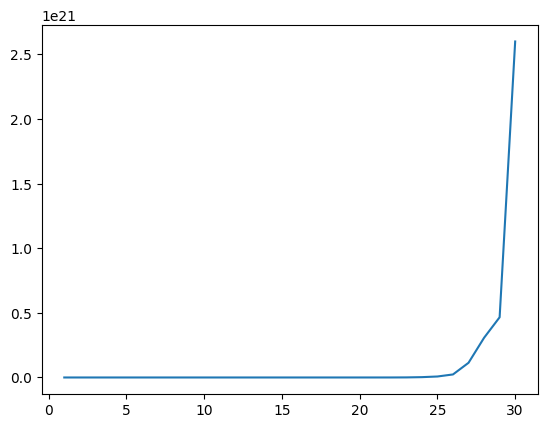

In [10]:
plt.plot([a for a in range(1, len(losses) + 1)], losses)
plt.show()

In [ ]:
#Implmenet logistic regression
x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100])
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1])
losses = []
learning_rate = torch.tensor(0.001)
w = torch.tensor([1.0], requires_grad = True)
b = torch.tensor([1.0], requires_grad = True)

for epoch in range(0, 200):
    loss = 0.0
    for data in range(0, len(x)):
        a = w*x[data] + b
        y_out = 1/(1 + torch.exp(-a))
        print("x: ", x[data])
        print("y_out", y_out)
        loss += - y[data]*torch.log(y_out + 0.01) - (1 - y[data])*torch.log(1 - y_out + 0.01)
        print(loss)
    loss = loss/len(x)
    losses.append(loss.item())
    loss.backward()
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
    w.grad.zero_()
    b.grad.zero_()
    print("Epoch number: " + str(epoch) + " W: " + str(w.item()) + " B: " + str(b.item()))


Streaming output truncated to the last 5000 lines.
x:  tensor(25)
y_out tensor([1.], grad_fn=<MulBackward0>)
tensor([20.2324], grad_fn=<AddBackward0>)
x:  tensor(50)
y_out tensor([1.], grad_fn=<MulBackward0>)
tensor([20.2225], grad_fn=<AddBackward0>)
x:  tensor(70)
y_out tensor([1.], grad_fn=<MulBackward0>)
tensor([20.2125], grad_fn=<AddBackward0>)
x:  tensor(75)
y_out tensor([1.], grad_fn=<MulBackward0>)
tensor([20.2026], grad_fn=<AddBackward0>)
x:  tensor(100)
y_out tensor([1.], grad_fn=<MulBackward0>)
tensor([20.1926], grad_fn=<AddBackward0>)
Epoch number: 21 W: 0.9954904913902283 B: 0.997517466545105
x:  tensor(1)
y_out tensor([0.8801], grad_fn=<MulBackward0>)
tensor([2.0407], grad_fn=<AddBackward0>)
x:  tensor(5)
y_out tensor([0.9975], grad_fn=<MulBackward0>)
tensor([6.4199], grad_fn=<AddBackward0>)
x:  tensor(10)
y_out tensor([1.0000], grad_fn=<MulBackward0>)
tensor([11.0233], grad_fn=<AddBackward0>)
x:  tensor(10)
y_out tensor([1.0000], grad_fn=<MulBackward0>)
tensor([15.6268], 

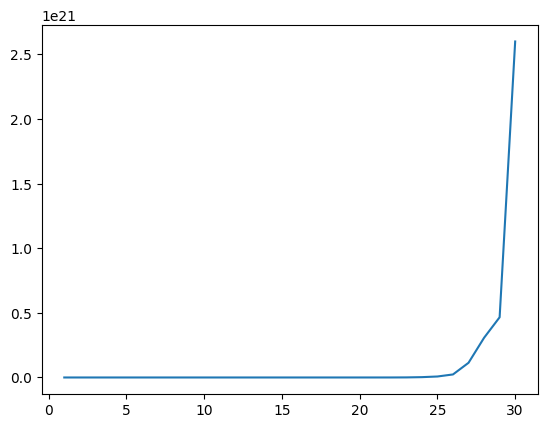

In [11]:
plt.plot([a for a in range(1, len(losses) + 1)], losses)
plt.show()